In [9]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#choose a data type mta or boa
name1 = 'mta'
name2 = 'boa'
file_path2 = f'{name1}.csv'

# קריאת הנתונים משני הקבצים
data = pd.read_csv(file_path2)
X = data.iloc[:, 0:19].values

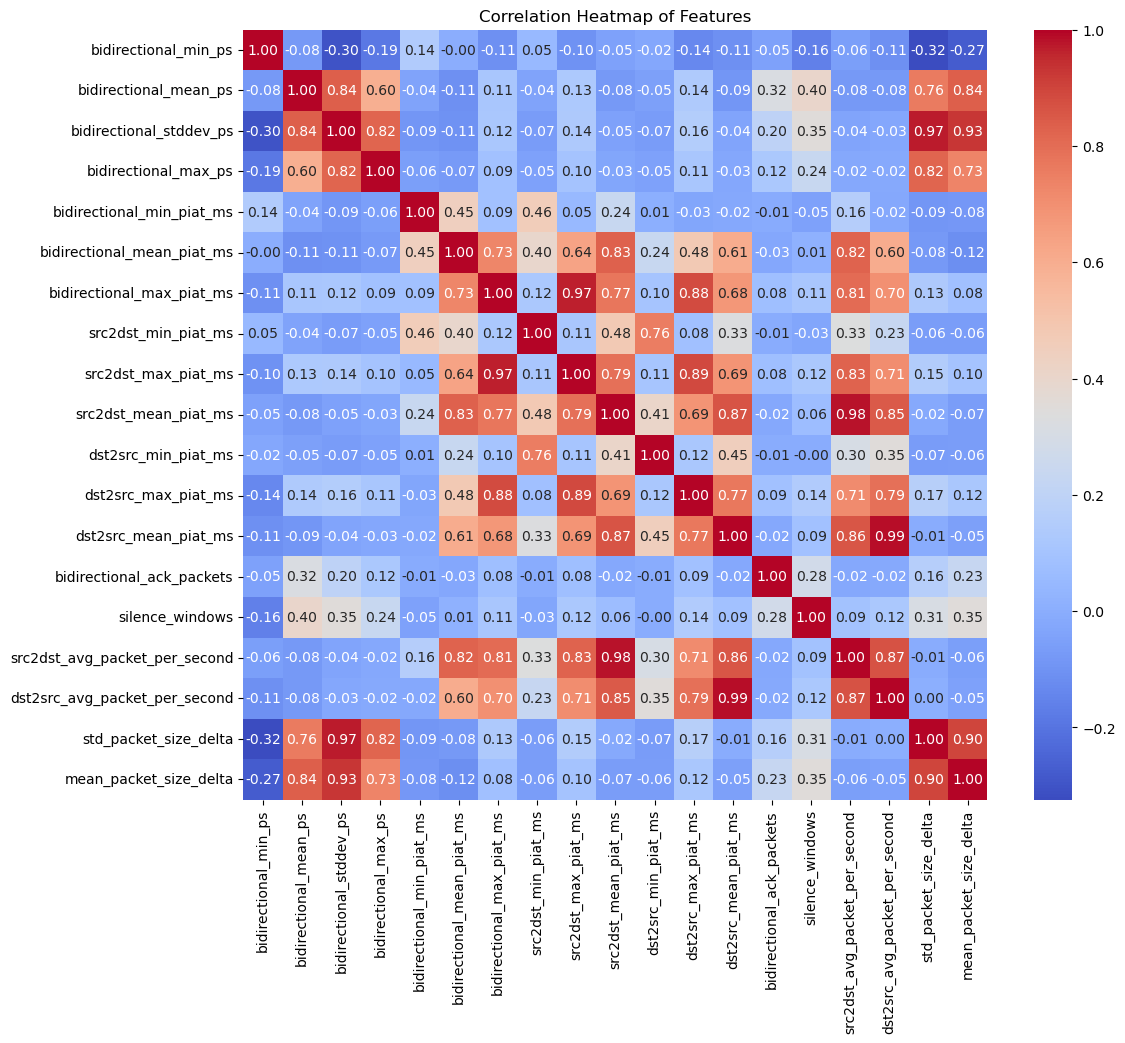

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# חישוב מטריצת הקורלציה
corr_matrix = data.iloc[:, 0:19].corr()

# יצירת ה-heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# חישוב מטריצת הקורלציה
corr_matrix = data.iloc[:, 0:19].corr()

# הגדרת סף לקורלציה גבוהה
threshold = 0.8

# מציאת כל הפיצ'רים שדומים (עם קורלציה מעל סף)
similar_features = []
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[1]):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            feature_pair = (corr_matrix.index[i], corr_matrix.columns[j])
            similar_features.append(feature_pair)
            print(f"Features {feature_pair[0]} and {feature_pair[1]} have a correlation of {corr_matrix.iloc[i, j]:.2f}")

# הדפסת הפיצ'רים להורדה
features_to_remove = set()
for pair in similar_features:
    features_to_remove.add(pair[1])  # ניתן לבחור להוריד את הפיצ'ר השני בכל זוג

print("\nFeatures to remove:")
for feature in features_to_remove:
    print(feature)

# הסרת הפיצ'רים הלא רלוונטיים מהנתונים
X_relevant = data.drop(columns=features_to_remove).iloc[:, 0:19].values


Features bidirectional_mean_ps and bidirectional_stddev_ps have a correlation of 0.84
Features bidirectional_mean_ps and mean_packet_size_delta have a correlation of 0.84
Features bidirectional_stddev_ps and bidirectional_max_ps have a correlation of 0.82
Features bidirectional_stddev_ps and std_packet_size_delta have a correlation of 0.97
Features bidirectional_stddev_ps and mean_packet_size_delta have a correlation of 0.93
Features bidirectional_max_ps and std_packet_size_delta have a correlation of 0.82
Features bidirectional_mean_piat_ms and src2dst_mean_piat_ms have a correlation of 0.83
Features bidirectional_mean_piat_ms and src2dst_avg_packet_per_second have a correlation of 0.82
Features bidirectional_max_piat_ms and src2dst_max_piat_ms have a correlation of 0.97
Features bidirectional_max_piat_ms and dst2src_max_piat_ms have a correlation of 0.88
Features bidirectional_max_piat_ms and src2dst_avg_packet_per_second have a correlation of 0.81
Features src2dst_max_piat_ms and ds

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# בחירת ה-X וה-y
X = data.iloc[:, 0:19]
y = data.iloc[:, 19:21]

# חישוב מטריצת הקורלציה
corr_matrix = X.corr()

# הגדרת סף לקורלציה גבוהה
threshold = 0.8

# מציאת כל הפיצ'רים שדומים (עם קורלציה מעל סף)
similar_features = []
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[1]):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            feature_pair = (corr_matrix.index[i], corr_matrix.columns[j])
            similar_features.append(feature_pair)

# הדפסת הפיצ'רים להורדה
features_to_remove = set()
for pair in similar_features:
    features_to_remove.add(pair[1])  # ניתן לבחור להוריד את הפיצ'ר השני בכל זוג

# הסרת הפיצ'רים הלא רלוונטיים מהנתונים
remaining_features = X.columns.difference(features_to_remove)
X_relevant = X[remaining_features]

# יצירת DataFrame חדש עם הפיצ'רים שנותרו והתיוגים
data_relevant = pd.concat([X_relevant, y], axis=1)

# שמירת הנתונים לאקסל
data_relevant.to_excel(f'remaining_features{file_path2}.xlsx', index=False)

print("The remaining features have been saved to 'remaining_featuresmta.xlsx'.")


The remaining features have been saved to 'remaining_featuresmta.xlsx'.
